In [1]:
import numpy as np
import pandas as pd

In [2]:
lcn = pd.read_csv(r"D:\imarticus\datasets\LungCapData.csv")

In [3]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
lcn.shape

(725, 6)

In [5]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [7]:
lcn.Gender = le.fit_transform(lcn.Gender)
lcn.Smoke = le.fit_transform(lcn.Smoke)
lcn.Caesarean = le.fit_transform(lcn.Caesarean)

In [8]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [9]:
lcn.corr()

,LungCap,Age,Height,Smoke,Gender,Caesarean
LungCap,1.000000,0.819675,0.912187,0.101374,0.169823,0.021317
Age,0.819675,1.000000,0.835737,0.211232,-0.030312,0.056339
Height,0.912187,0.835737,1.000000,0.176534,0.141441,0.060397
Smoke,0.101374,0.211232,0.176534,1.000000,-0.053528,0.038330
Gender,0.169823,-0.030312,0.141441,-0.053528,1.000000,0.013070
Caesarean,0.021317,0.056339,0.060397,0.038330,0.013070,1.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
 lcn_train , lcn_test = train_test_split(lcn,test_size = .2)

In [12]:
lcn_train_x = lcn_train.iloc[:,1:6]
lcn_train_y = lcn_train.iloc[:,0]
lcn_test_x = lcn_test.iloc[:,1:6]
lcn_test_y = lcn_test.iloc[:,0]

In [13]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [14]:
linreg.fit( lcn_train_x , lcn_train_y)

LinearRegression()

In [15]:
Rsquare = linreg.score(lcn_train_x , lcn_train_y)
Rsquare

0.8593888149513522

In [16]:
linreg.intercept_

-11.450000229062148

In [17]:
linreg.coef_

array([ 0.1545875 ,  0.26781978, -0.55874019,  0.31560171, -0.21829108])

In [18]:
Rsquare = linreg.score(lcn_train_x , lcn_train_y)
N = lcn_train_x.shape[0]
K = lcn_train_x.shape[1]

In [19]:
AdjRsquare = 1 - (1-Rsquare) * (N -1)/(N-K-1)
AdjRsquare

0.8581639788446567

In [20]:
pred_train = linreg.predict(lcn_train_x)
pred_test  = linreg.predict(lcn_test_x)

In [21]:
len(pred_train)

580

In [22]:
lcn_train_x.shape

(580, 5)

In [23]:
len(pred_test)

145

In [24]:
lcn_test_x.shape

(145, 5)

In [25]:
error_train = lcn_train_y - pred_train
error_train

330    0.461385
356    0.976951
12     0.404711
419   -2.173937
344    0.559672
         ...   
506   -2.238712
68     1.101944
474    0.346814
590    0.658646
98    -0.723703
Name: LungCap, Length: 580, dtype: float64

In [26]:
error_test = lcn_test_y - pred_test
error_test

574    0.896983
60     0.788185
432   -0.655778
14     1.022953
106   -0.684395
         ...   
401   -1.652312
176   -1.226890
697   -2.140276
444   -0.991036
378   -0.914853
Name: LungCap, Length: 145, dtype: float64

In [27]:
np.mean(error_train)

5.773159728050814e-16

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\danga\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


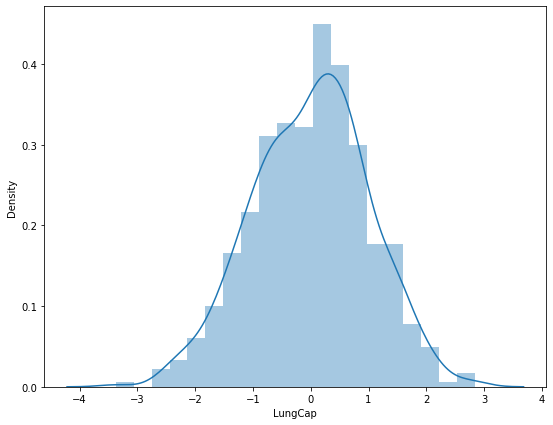

In [30]:
plt.figure(figsize=(9,7))
sns.distplot(error_train);

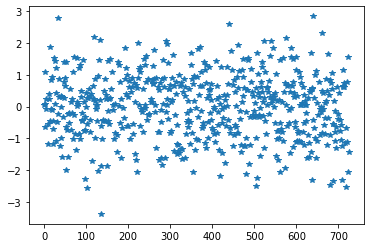

In [31]:
plt.plot(error_train,"*")

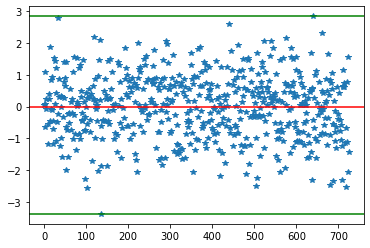

In [32]:
plt.plot(error_train,"*")
plt.axhline(y=np.mean(error_train),color='r')
plt.axhline(y=np.max(error_train),color='g')
plt.axhline(y=np.min(error_train),color='g')

In [33]:
pred_actual = pd.DataFrame({"Predicted" : pred_train, "Actual": lcn_train_y})
pred_actual

,Predicted,Actual
330,3.688615,4.150
356,10.723049,11.700
12,6.120289,6.525
419,4.423937,2.250
344,4.490328,5.050
...,...,...
506,11.338712,9.100
68,7.498056,8.600
474,8.703186,9.050
590,8.491354,9.150


<Figure size 720x720 with 0 Axes>

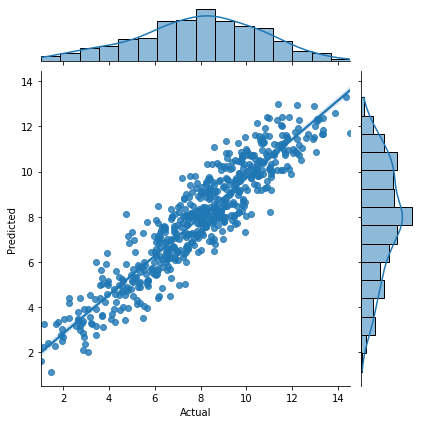

In [34]:
plt.figure(figsize=(10,10))
sns.jointplot(x='Actual',y='Predicted',data=pred_actual,kind='reg');
# predicted on Y and actual on X

In [35]:
mse_test = np.mean(np.square(error_test))
mse_test


1.1638904487174193

In [36]:
rmse_test = np.sqrt(mse_test)
rmse_test

1.0788375451000114

In [37]:
mape_test = np.mean(np.abs(error_test*100/lcn_test_y))
mape_test

16.48796347475114

In [38]:
Accuracy = 100- mape_test
Accuracy

83.51203652524886

In [39]:
mse_test = np.mean(np.square(error_test))

rmse_test = np.sqrt(mse_test)

mape_test = np.mean(np.abs(error_test*100/lcn_test_y))

Accuracy = 100- mape_test

print("MSE-->",mse_test)
print("RMSE-->",rmse_test)
print("MAPE-->",mape_test)
print('Accuracy-->',Accuracy)

MSE--> 1.1638904487174193
RMSE--> 1.0788375451000114
MAPE--> 16.48796347475114
Accuracy--> 83.51203652524886
